# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import openml
import matplotlib.pyplot as plt

# Sklearn Imports

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, log_loss

In [3]:
# Ignore all warnings (convergence..) by sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
# Get dataset by name
dataset = openml.datasets.get_dataset('mnist_784')

# Get the data itself as a dataframe (or otherwise)
X_pd, y_pd, categorical_indicator, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute, dataset_format="dataframe"
)
# Convert to numpy array
X = X_pd.to_numpy()
y = y_pd.to_numpy().astype(np.int32)

In [5]:
# X.shape[0]*0.7

## Train , Test Split by 70% train , 30% test

In [6]:
# Train Split
X_train=X[:49000]
X_test=X[49000:]
# Test Split
y_train=y[:49000]
y_test=y[49000:]

In [7]:
dig_6_idx = np.where(y_train == 6)[0]
dig_9_idx = np.where(y_train == 9)[0]
index = np.concatenate((dig_6_idx,dig_9_idx))
# get all samples from the index array
X_train_69 = X_train[index,:]
# create the label vector
y_train_69 = np.concatenate(((np.ones(len(dig_6_idx))*1),(np.ones(len(dig_9_idx))*0)))

In [8]:
dig_6_idx = np.where(y_test == 6)[0]
dig_9_idx = np.where(y_test == 9)[0]
index = np.concatenate((dig_6_idx,dig_9_idx))
# get all samples from the index array
X_test_69 = X_test[index,:]
# create the label vector
y_test_69 = np.concatenate(((np.ones(len(dig_6_idx))*1),(np.ones(len(dig_9_idx))*0)))

In [9]:
X_train_69,y_train_69 = shuffle(X_train_69,y_train_69,random_state=1729)
X_test_69,y_test_69 = shuffle(X_test_69,y_test_69,random_state=1729)

# Solutions

## Ques 1

In [10]:
# iterations
it=30

### Option 1

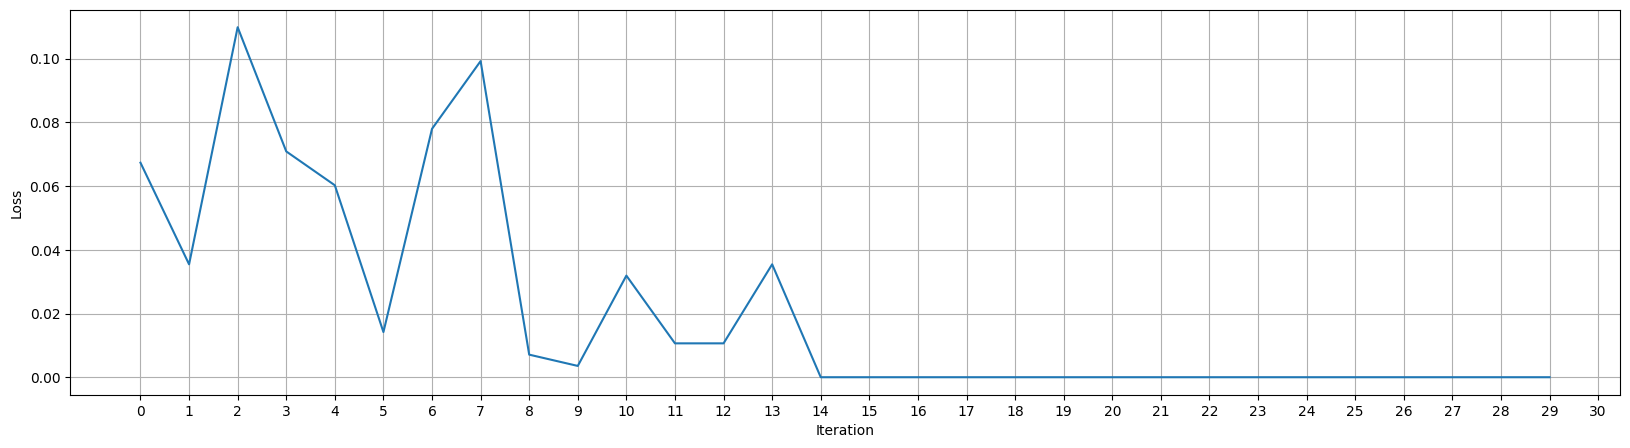

In [11]:
estimator = SGDClassifier(loss='log_loss',
penalty='l2',
max_iter=1,
warm_start=True,
eta0=0.01,
alpha=0,
learning_rate='constant',
random_state=10)
pipe_sgd= make_pipeline(estimator)
Loss=[]
iterations= it
for i in range(iterations):
    pipe_sgd.fit(X_train_69,y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    Loss.append(log_loss(y_train_69,y_pred))
plt.figure(figsize=(20,5))
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
# Change Scale
plt.xticks(np.arange(0, 31, 1.0))
plt.show()

### Option 2 

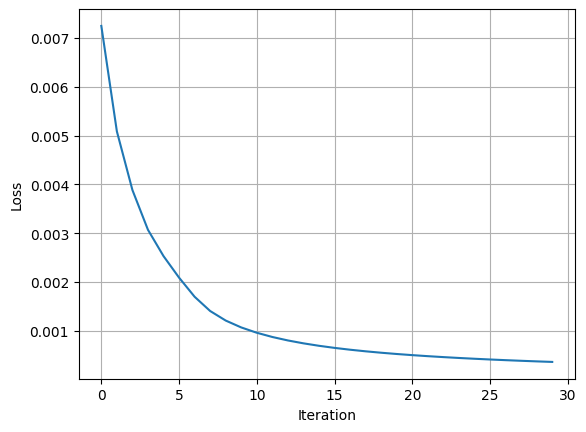

In [12]:
estimator = SGDClassifier(loss='log_loss',
penalty='l2',
max_iter=1,
warm_start=True,
eta0=0.000001,
alpha=0,
learning_rate='constant',
random_state=10)
pipe_sgd= make_pipeline(estimator)
Loss=[]
iterations= it
for i in range(iterations):
    pipe_sgd.fit(X_train_69,y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### Option 3

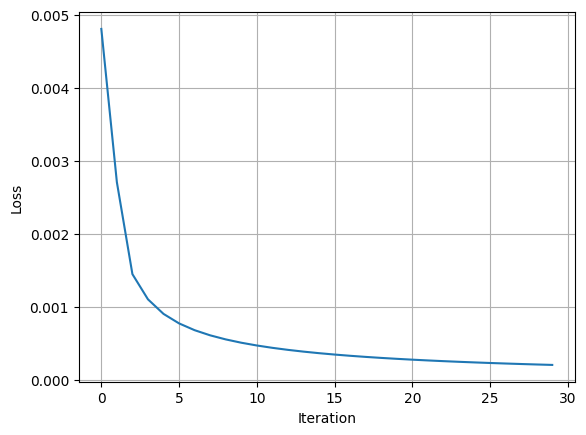

In [13]:
estimator = SGDClassifier(loss='log_loss',
penalty='l2',
max_iter=1,
warm_start=True,
eta0=0.01,
alpha=0,
learning_rate='constant',
random_state=10)
scaler=StandardScaler()
pipe_sgd= make_pipeline(scaler,estimator)
Loss=[]
iterations= it
for i in range(iterations):
    pipe_sgd.fit(X_train_69,y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### Option 4

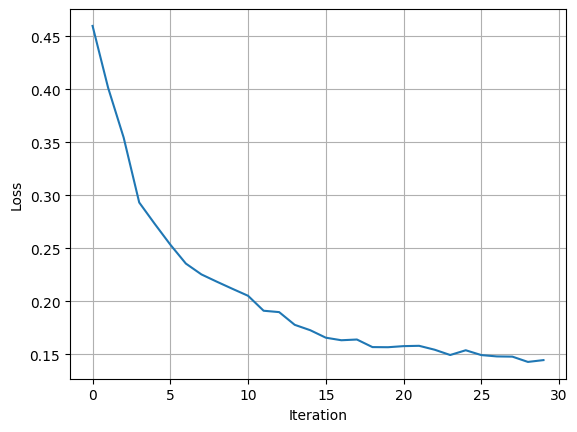

In [14]:
estimator = SGDClassifier(loss='log_loss',
penalty='l2',
max_iter=1,
warm_start=True,
eta0=0.01,
power_t=1,
alpha=0,
learning_rate='invscaling',
random_state=10)
# scaler=StandardScaler()
pipe_sgd= make_pipeline(estimator)
Loss=[]
iterations= it
for i in range(iterations):
    pipe_sgd.fit(X_train_69,y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Question 2

In [15]:
estimator = SGDClassifier(random_state=10,
# loss='log_loss',penalty='l2',
max_iter=10,
# warm_start=True,
eta0=0.5,
power_t=0.5,
alpha=0,
learning_rate='invscaling',
shuffle=True)
pipe_sgd= make_pipeline(estimator)

### Train

In [16]:
pipe_sgd.fit(X_train_69,y_train_69)

Pipeline(steps=[('sgdclassifier',
                 SGDClassifier(alpha=0, eta0=0.5, learning_rate='invscaling',
                               max_iter=10, random_state=10))])

In [17]:
y_pred_train=pipe_sgd.predict(X_train_69)
y_pred_train

array([1., 0., 1., ..., 1., 1., 1.])

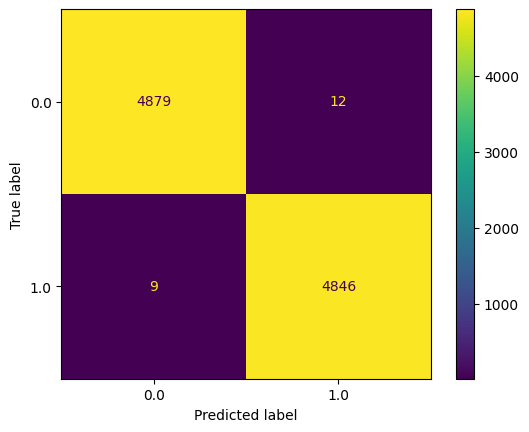

In [18]:
clf=pipe_sgd[-1]
cm=confusion_matrix(y_train_69,y_pred_train,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

## Question 3

### Experiment 

In [19]:
index=0
c=0
in_l=[]
for i,j in zip(y_train_69,y_pred_train):
    if i==0 and j==1:
        c+=1;
        in_l.append(index)
    index+=1
print('False Positive count',c)
in_l

False Positive count 12


[1053, 1613, 2167, 2407, 2536, 3368, 3396, 4217, 4690, 6149, 6230, 7900]

### Validation

In [20]:
index

9746

In [21]:
y_train_69.shape

(9746,)

# END